# SDPA Coursework Part3
## A Glance at Virtual Streamer
vtb vup, vcc(Virtual Streamer)

In [2]:

import json
import numpy as np
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

Text(0.5, 0, 'follower')

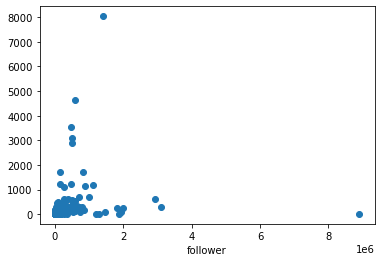

In [19]:
# plt.scatter(popular_only_vs_concern_cols["follower"], popular_only_vs_concern_cols["lastLivePopulation"]);
plt.scatter(popular_only_vs_concern_cols["follower"], popular_only_vs_concern_cols["guardNum"]);
plt.xlabel("follower")
# plt.ylabel("lastLivePopulation")

In [40]:
pg_1_df = pd.read_html("https://vtubie.com/allvtubers/?pg=1")

In [43]:
from bs4 import BeautifulSoup

In [92]:
import re

In [517]:
url = "https://vtubie.com/allvtubers/?pg="
# pg_1 = requests.get("https://vtubie.com/allvtubers/?pg=1")

link_set = set() # for every vtuber's info page

for page in range(1,51):
    print("processing page " + str(page))
    url_full = url + str(page)
    pg_get = requests.get(url_full) # requests for one page
    pg_soup = BeautifulSoup(pg_get.text)
    for a in pg_soup.find_all(title = "Visit VTuber"):
        link_set.add(a.attrs['href'])
        
print(len(link_set))
link_set
    
    

processing page 1
processing page 2
processing page 3
processing page 4
processing page 5
processing page 6
processing page 7
processing page 8
processing page 9
processing page 10
processing page 11
processing page 12
processing page 13
processing page 14
processing page 15
processing page 16
processing page 17
processing page 18
processing page 19
processing page 20
processing page 21
processing page 22
processing page 23
processing page 24
processing page 25
processing page 26
processing page 27
processing page 28
processing page 29
processing page 30
processing page 31
processing page 32
processing page 33
processing page 34
processing page 35
processing page 36
processing page 37
processing page 38
processing page 39
processing page 40
processing page 41
processing page 42
processing page 43
processing page 44
processing page 45
processing page 46
processing page 47
processing page 48
processing page 49
processing page 50
500


{'https://vtubie.com/%e3%81%86%e3%81%bfch-%e5%b9%bd%e3%83%b6%e5%b4%8e%e6%b5%b7%e6%84%9b',
 'https://vtubie.com/%e3%81%96%e3%81%8d%e3%80%8a%e5%bd%b9%e6%ba%80vtuber%e3%80%8b',
 'https://vtubie.com/%e3%81%97%e3%81%8d%e3%81%b6tv',
 'https://vtubie.com/%e3%81%99%e3%81%82%e3%81%a0%e3%81%a1%e3%82%83%e3%82%93%e3%81%ad%e3%82%8b',
 'https://vtubie.com/%e3%81%99%e3%82%82%e3%82%82%e3%83%81%e3%83%a3%e3%83%b3%e3%83%8d%e3%83%ab',
 'https://vtubie.com/%e3%81%99%e3%83%bc%e3%81%a1%e3%82%83%e3%82%93%e3%81%ad%e3%82%8b',
 'https://vtubie.com/%e3%81%9f%e3%81%be%e3%81%93%e3%80%82ch-%e3%81%82%e3%81%8a%e3%81%8e%e3%82%8a%e9%ab%98%e6%a0%a1',
 'https://vtubie.com/%e3%81%a8%e3%82%82%e3%81%88%e3%81%a8%e3%82%a8%e3%83%ab%e3%82%bc%e3%81%ae%e3%81%bb%e3%82%93%e3%82%8f%e3%81%8basmr',
 'https://vtubie.com/%e3%81%aa%e3%81%9a%e3%81%a1%e3%82%83%e3%82%93%e3%81%ad%e3%82%8b',
 'https://vtubie.com/%e3%81%aa%e3%81%aa%e3%81%aach',
 'https://vtubie.com/%e3%81%ad%e3%81%b7%e3%81%ad%e3%81%b7',
 'https://vtubie.com/%e3%81%b2%e3%81%84%e

In [520]:
# create dataframe's header
vt_all_info_df = pd.DataFrame(columns=col_name)

# parse html -> dataframe
for vtuber_info_url in link_set:
    print("Processing " + vtuber_info_url)
    vt_info_get = requests.get(vtuber_info_url) # requests the vtuber information page
    vt_info_soup = BeautifulSoup(vt_info_get.text) # parse the html by beautifulsoup 
    
    name = vt_info_soup.find("h1").get_text() # name of the vtb
    try:
        type_ = vt_info_soup.find_all("a", href = re.compile("/type/*"))[0].get_text()
    except IndexError:
        pass
    
    group = vt_info_soup.find_all("a", href = re.compile("https://vtubie.com/g/*"), title = False)[0].get_text()
    
    genre = vt_info_soup.find_all("a", href = re.compile("/genre/*"))
    genre_list = [(lambda s: s.get_text())(i) for i in genre]
    try:
        gender = vt_info_soup.find_all("a", href = re.compile("/gender/*"))[0].get_text()
    except IndexError:
        pass
    
    language = vt_info_soup.find_all("a", href = re.compile("/language/*"))
    language_list = [(lambda s: s.get_text())(i) for i in language]
    
    model = vt_info_soup.find_all("a", href = re.compile("/model/*"))
    model_list = [(lambda s: s.get_text())(i) for i in model]
    
    debut = vt_info_soup.find_all(string = "Debut ")[0].parent.find_next_sibling().get_text().strip()
    status = vt_info_soup.find_all(string = "Status")[0].parent.parent.find_next_sibling().get_text().strip()
    freq = vt_info_soup.find_all(string = "Release Frequency")[0].parent.find_next_sibling().get_text().strip()
    subs = vt_info_soup.find(string = "Subs").parent.find_next_sibling().get_text().strip()
    views = vt_info_soup.find(string = "Views").parent.find_next_sibling().get_text().strip()
    
    col = [name, type_, group, genre_list, gender, language_list, model_list, debut, status, freq, subs, views]
    col_name = ['name', 'type_', 'group', 'genre_list', 'gender', 'language_list', 'model_list', 'debut', 'status', 'freq', 'subs', 'views']
    vt_info_df = pd.DataFrame([col], columns=col_name)
    vt_all_info_df = vt_all_info_df.append(vt_info_df, ignore_index = True)



Processing https://vtubie.com/lize-helesta
Processing https://vtubie.com/naraka
Processing https://vtubie.com/takao-shinji
Processing https://vtubie.com/shellin-burgundy
Processing https://vtubie.com/souya-ichika
Processing https://vtubie.com/shimamura-charlotte
Processing https://vtubie.com/cry
Processing https://vtubie.com/lumi-celestia
Processing https://vtubie.com/wolfychu
Processing https://vtubie.com/sakura-ritsuki
Processing https://vtubie.com/lita
Processing https://vtubie.com/%e3%83%93%e3%83%bc%e3%83%88%e3%81%be%e3%82%8a%e3%81%8a-coolcreate
Processing https://vtubie.com/projekt-melody
Processing https://vtubie.com/hanabasami-kyo
Processing https://vtubie.com/macoto
Processing https://vtubie.com/%e9%81%a0%e5%8c%97%e5%8d%83%e5%8d%97-achikita-chinami-%e3%80%90%e3%81%ab%e3%81%98%e3%81%95%e3%82%93%e3%81%98%e3%80%91
Processing https://vtubie.com/fushimi-gaku
Processing https://vtubie.com/shishigami-leona
Processing https://vtubie.com/whispermute
Processing https://vtubie.com/shirayu

Processing https://vtubie.com/omaru-polka
Processing https://vtubie.com/suzuka-utako
Processing https://vtubie.com/%e5%87%aa%e5%8e%9f%e6%b6%bc%e8%8f%9c-suzuna-nagihara
Processing https://vtubie.com/fumi
Processing https://vtubie.com/%e7%8a%ac%e5%a1%9a%e3%81%84%e3%81%a1%e3%81%94
Processing https://vtubie.com/%e3%82%a2%e3%83%a1%e3%83%8e%e3%82%bb%e3%82%a4-amenosei
Processing https://vtubie.com/%e3%83%9b%e3%83%ad%e3%82%b9%e3%82%bf%e3%83%bc%e3%82%ba%e5%85%ac%e5%bc%8f
Processing https://vtubie.com/hayama-marin
Processing https://vtubie.com/yuchan-channel
Processing https://vtubie.com/hoshikawa-sara
Processing https://vtubie.com/shishiro-botan
Processing https://vtubie.com/senpai-artz
Processing https://vtubie.com/moeka-hoshizora
Processing https://vtubie.com/fuji-aoi
Processing https://vtubie.com/%e5%80%89%e6%8c%81%e4%ba%ac%e5%ad%90ch-kuramochikyoko
Processing https://vtubie.com/kaida-haru
Processing https://vtubie.com/amakawa-hano
Processing https://vtubie.com/canan
Processing https://vtubi

Processing https://vtubie.com/honma-himawari
Processing https://vtubie.com/%e5%a4%9c%e3%81%ae%e9%9b%91%e5%ad%a6-%e9%87%91%e7%be%8e%e9%a4%a8%e9%80%9a%e3%82%8a%e3%81%ae%e8%97%a4%e6%9d%91%e3%81%95%e3%82%93
Processing https://vtubie.com/fae-leon
Processing https://vtubie.com/yuni
Processing https://vtubie.com/keiichi-arawi
Processing https://vtubie.com/lemonleafasmr
Processing https://vtubie.com/liz
Processing https://vtubie.com/liliana-vampaia
Processing https://vtubie.com/joe-rikiichi
Processing https://vtubie.com/todo-kohaku
Processing https://vtubie.com/%e3%81%86%e3%81%bfch-%e5%b9%bd%e3%83%b6%e5%b4%8e%e6%b5%b7%e6%84%9b
Processing https://vtubie.com/yumeno-shiori
Processing https://vtubie.com/bknchannel
Processing https://vtubie.com/yuzuki-roa
Processing https://vtubie.com/qualia-qu
Processing https://vtubie.com/umai-lele
Processing https://vtubie.com/gundo-mirei
Processing https://vtubie.com/the-binary-mido-%e3%81%82%e3%81%8b%e3%81%be%e3%82%8b
Processing https://vtubie.com/ai-angel
Pro

Processing https://vtubie.com/%e3%81%99%e3%81%82%e3%81%a0%e3%81%a1%e3%82%83%e3%82%93%e3%81%ad%e3%82%8b
Processing https://vtubie.com/artsyvrc
Processing https://vtubie.com/%e6%a9%98%e3%81%b2%e3%81%aa%e3%81%ae-hinano-tachibana
Processing https://vtubie.com/evelyn
Processing https://vtubie.com/%e7%a5%9e%e6%88%90%e3%81%8d%e3%82%85%e3%81%b4
Processing https://vtubie.com/tenkai-tukasa
Processing https://vtubie.com/hatoba-tsugu
Processing https://vtubie.com/kureiji-ollie
Processing https://vtubie.com/taka-radjiman
Processing https://vtubie.com/kenmochi-toya
Processing https://vtubie.com/ange-katrina
Processing https://vtubie.com/sasaki-saku
Processing https://vtubie.com/isekaijoucho
Processing https://vtubie.com/himemori-luna


In [ ]:
# save the dataframe into a csv
vt_all_info_df.to_csv("vt_all_info_df_origin.csv")


In [534]:
# read from the csv
vt_all_info_df = pd.read_csv("vt_all_info_df_origin.csv")

In [536]:
vt_all_info_df.head(10)

,Unnamed: 0,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views
0,0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m
1,1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m
2,2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m
3,3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m
4,4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m
5,5,Shimamura Charlotte,VTuber,HoneyStrap,[],Female,['Japanese'],"['3D', 'L2D']",2018/07/14,+ Add,Every 1.16 Day(s),75.9k,8m
6,6,Cry,VStreamer,Independent,['Art'],Female,['English'],[],+ Add,Active,Every 9.44 Day(s),475.7k,41.5m
7,7,Lumi Celestia,VTuber,MAHAPANCA,[],Female,['Indonesian'],['L2D'],2020/08/01,+ Add,Every 4.79 Day(s),177k,5.9m
8,8,Wolfychu,VStreamer,Independent,['Gaming'],Female,['English'],['L2D'],11/08/2020,Active,Every 1.96 Day(s),501.1k,5.3m
9,9,Sakura Ritsuki,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2018/08/31,+ Add,Every 1.16 Day(s),205k,26m


In [563]:
vt_all_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           500 non-null    object
 1   type_          500 non-null    object
 2   group          500 non-null    object
 3   genre_list     500 non-null    object
 4   gender         500 non-null    object
 5   language_list  500 non-null    object
 6   model_list     500 non-null    object
 7   debut          500 non-null    object
 8   status         500 non-null    object
 9   freq           500 non-null    object
 10  subs           500 non-null    object
 11  views          500 non-null    object
 12  has_group      500 non-null    bool  
 13  freq_float     499 non-null    object
dtypes: bool(1), object(13)
memory usage: 51.4+ KB


In [564]:
# check how many categories in "type_"
vt_all_info_df.type_.value_counts()

VTuber       457
VStreamer     43
Name: type_, dtype: int64

In [571]:
# check how many categories in "group"
print(vt_all_info_df.group.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.group.value_counts().count())

Independent    247
Nijisanji      108
Hololive        57
.LIVE           12
VShojo           9
Name: group, dtype: int64
Total numbers of categories:  34


In [570]:
# how many categories in "language"
print(vt_all_info_df.language_list.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.language_list.value_counts().count())

['Japanese']                             361
['English']                               77
['Indonesian']                            12
['English', 'Indonesian', 'Japanese']      5
['English', 'Indonesian']                  5
Name: language_list, dtype: int64
Total numbers of categories:  29


In [574]:
# how many categories in "genre"
print(vt_all_info_df.genre_list.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.genre_list.value_counts().count())

[]                                 363
['Chatting', 'Gaming', 'Music']     32
['Chatting', 'Gaming']              20
['Gaming']                          19
['Music']                            5
Name: genre_list, dtype: int64
Total numbers of categories:  51


In [572]:
# how many categories in "gender"
print(vt_all_info_df.gender.value_counts().head())
print("Total numbers of categories: ", vt_all_info_df.gender.value_counts().count())

Female         411
Male            81
Agender          5
Genderfluid      2
Non-binary       1
Name: gender, dtype: int64
Total numbers of categories:  5


In [575]:
# how many categories in "model_list"
vt_all_info_df.model_list.value_counts()

['L2D']                         177
[]                              127
['3D', 'L2D']                   109
['3D']                           80
['3D', 'JPEG', 'L2D']             1
['JPEG', 'L2D']                   1
['Model', 'L2D']                  1
['JPEG', 'L2D', 'PNG']            1
['L2D', 'PNG']                    1
['PNG']                           1
['3D', 'GIF', 'JPEG', 'PNG']      1
Name: model_list, dtype: int64

In [580]:
# how many categories in "status"
vt_all_info_df.status.value_counts()
vt_all_info_df[vt_all_info_df.type_ == "VStreamer"]

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
6,Cry,VStreamer,Independent,['Art'],Female,['English'],[],+ Add,Active,Every 9.44 Day(s),475.7k,41.5m,False,9.44
8,Wolfychu,VStreamer,Independent,['Gaming'],Female,['English'],['L2D'],11/08/2020,Active,Every 1.96 Day(s),501.1k,5.3m,False,1.96
18,WhisperMute,VStreamer,Independent,"['Chatting', 'Gaming']",Agender,['English'],['3D'],2018-08-05,Active,Every 1.47 Day(s),146.9k,26.8m,False,1.47
21,WooHooLad,VStreamer,Independent,['Gaming'],Genderfluid,['English'],['L2D'],+ Add,Active,Every 0.35 Day(s),121.1k,3.1m,False,0.35
24,GammaInkk,VStreamer,Independent,[],Female,['English'],[],+ Add,+ Add,Every 3.2 Day(s),84.1k,700.9k,False,3.2
28,Beeewitch,VStreamer,Independent,"['Anime', 'Chatting', 'Education', 'Gaming', '...",Female,['English'],"['3D', 'L2D']",01/05/2020,Active,Every 6.55 Day(s),140.5k,8.7m,False,6.55
31,Anny,VStreamer,Independent,"['Art', 'Chatting', 'Gaming']",Female,['English'],['L2D'],03/13/2021,Active,Every 12.93 Day(s),241.5k,5.2m,False,12.93
33,Jordan Sweeto,VStreamer,Independent,['Gaming'],Male,['English'],['L2D'],11/14/2020,Active,Every 3.94 Day(s),159.3k,2.1m,False,3.94
42,Takahata,VStreamer,Independent,"['Anime', 'ASMR', 'Chatting', 'Gaming', 'Voice...",Male,['English'],['L2D'],01/01/2021,Active,Every 0.45 Day(s),125.2k,12.8m,False,0.45
51,thecodemiko,VStreamer,Independent,[],Female,['English'],[],+ Add,+ Add,Every 0.91 Day(s),1.2m,42.5m,False,0.91


- The first column is not useful.  
- The type_ coloum have 2 types: VTuber and VStreamer. In my personal opinion, the two categories are actually vague in the website. For example, Nyatasha Nyanners is a famous virtual streamer in Twitch (a live stream platform), but her type in the website is VTuber.
- The genre_list column have many null values, and it need to be convert from list to NoneType.  
- The gender column have 5 categories. To simplified, turn the non-binary categories in to null values.  
- Some VTuber have multiple language in their language list. Need to check whether the language list has null values.  
- The modol_list has 4 kinds of model, picture type, GIF, 3D and L2D (Live2D). The null values in model list are the same as genre list.  
- The debut column indicates the date when the VTuber began their activity. The date formats are mixed, and the null values are shown as "+ Add".  
- The status column has many missing values. But usually, the retired VTubers are marked, and the missing value can be consider as active. 
- The freq column indicates that the content release frequency of the VTuber.
- The subs (subscribe) and views (video views).

#### Next I am going to modify some columns' dtype

In [610]:
# delete the meaningless column

vt_all_info_df.pop("Unnamed: 0")
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m,True,1.72


In [611]:
# convert the group into a binary category variable
vt_all_info_df["has_group"] = (vt_all_info_df.group != "Independent")
vt_all_info_df.head(10)

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m,True,1.72
5,Shimamura Charlotte,VTuber,HoneyStrap,[],Female,['Japanese'],"['3D', 'L2D']",2018/07/14,+ Add,Every 1.16 Day(s),75.9k,8m,True,1.16
6,Cry,VStreamer,Independent,['Art'],Female,['English'],[],+ Add,Active,Every 9.44 Day(s),475.7k,41.5m,False,9.44
7,Lumi Celestia,VTuber,MAHAPANCA,[],Female,['Indonesian'],['L2D'],2020/08/01,+ Add,Every 4.79 Day(s),177k,5.9m,True,4.79
8,Wolfychu,VStreamer,Independent,['Gaming'],Female,['English'],['L2D'],11/08/2020,Active,Every 1.96 Day(s),501.1k,5.3m,False,1.96
9,Sakura Ritsuki,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2018/08/31,+ Add,Every 1.16 Day(s),205k,26m,True,1.16


In [612]:
# parse the freq -> float type
vt_all_info_df['freq_float'] = vt_all_info_df["freq"].apply(lambda x: x.split() if len(x) > 10 else [None, None])\
.apply(lambda x: x[1])

vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609k,104.6m,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285k,25.3m,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151k,41.9m,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254k,29.9m,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90.1k,9.4m,True,1.72


In [638]:
# subs and views convert to int
unit_trans = {'k': 1000, 'm': 1000000, 'b': 1000000000}

# vt_all_info_df["subs"].apply(lambda x: x[-1]).value_counts() # -> subs value have no missing value
# vt_all_info_df["views"].apply(lambda x: x[-1]).value_counts() # -> subs value have no missing value

vt_all_info_df["subs"] = vt_all_info_df["subs"].apply(lambda x: float(x[:-1]) * unit_trans[x[-1]])
vt_all_info_df["views"] = vt_all_info_df["views"].apply(lambda x: float(x[:-1]) * unit_trans[x[-1]])

vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72


In [609]:
import ast # the "list" in the vt_all_info_df is actually str, it need to be convert into list type by ast.literal_eval()

print(vt_all_info_df['genre_list'].apply(ast.literal_eval).explode().value_counts())
print(vt_all_info_df['language_list'].apply(ast.literal_eval).explode().value_counts())
print(vt_all_info_df['model_list'].apply(ast.literal_eval).explode().value_counts())


# vt_all_info_df.explode("genre_list")

Gaming          120
Chatting         98
Music            58
Art              20
Anime            18
ASMR             15
Mature           10
Voice Acting      8
Manga             8
Horror            6
LGBTQ+            5
Cooking           4
Education         4
Name: genre_list, dtype: int64
Japanese      383
English       109
Indonesian     22
Korean          7
Spanish         6
Thai            4
Filipino        4
Russian         4
German          2
Malay           2
Chinese         2
French          2
Italian         1
Portuguese      1
Swedish         1
Name: language_list, dtype: int64
L2D      291
3D       191
JPEG       4
PNG        4
Model      1
GIF        1
Name: model_list, dtype: int64


In [639]:
# convert the debut date into vtuber existence time

# dealing with mixed format of datetime
date1 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%Y/%m/%d")
date2 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d/%m/%Y")
date3 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%m/%d/%Y")
date4 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d %b %Y")
date5 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%d %B %Y")
date6 = pd.to_datetime(vt_all_info_df.debut, errors="coerce", format="%b %d %Y")

vt_all_info_df["debut_dt"] = date1
vt_all_info_df["debut_dt"].fillna(date2, inplace = True)
vt_all_info_df["debut_dt"].fillna(date3, inplace = True)
vt_all_info_df["debut_dt"].fillna(date4, inplace = True)
vt_all_info_df["debut_dt"].fillna(date5, inplace = True)
vt_all_info_df["debut_dt"].fillna(date6, inplace = True)


In [640]:
vt_all_info_df["exist_days"] = (pd.to_datetime("now") - vt_all_info_df["debut_dt"]).dt.days

In [641]:
vt_all_info_df.head()

,name,type_,group,genre_list,gender,language_list,model_list,debut,status,freq,subs,views,has_group,freq_float,debut_dt,exist_days
0,Lize Helesta,VTuber,Nijisanji,[],Female,['Japanese'],"['3D', 'L2D']",2019/03/23,+ Add,Every 2.51 Day(s),609000.0,104600000.0,True,2.51,2019-03-23,1019.0
1,Naraka,VTuber,Nijisanji,[],Female,['Japanese'],['L2D'],2019/12/29,+ Add,Every 1.91 Day(s),285000.0,25300000.0,True,1.91,2019-12-29,738.0
2,Takao Shinji,VTuber,Independent,[],Male,['Japanese'],['L2D'],+ Add,+ Add,Every 1.83 Day(s),151000.0,41900000.0,False,1.83,NaT,NaN
3,Shellin Burgundy,VTuber,Nijisanji,[],Male,['Japanese'],['L2D'],2019/09/21,+ Add,Every 2.83 Day(s),254000.0,29900000.0,True,2.83,2019-09-21,837.0
4,Souya Ichika,VTuber,AniMare,[],Female,['Japanese'],"['3D', 'L2D']",2018/06/09,+ Add,Every 1.72 Day(s),90100.0,9400000.0,True,1.72,2018-06-09,1306.0
